In [59]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [60]:
#PATH ALLOCATION
data_dir=os.path.join('data')
classes=os.listdir(data_dir)
classes
#data.class_names

['fake', 'real']

In [61]:
#LOADING DATA
from numpy import *
data=tf.keras.utils.image_dataset_from_directory('data',batch_size=8,image_size=(128,128))
data

Found 841 files belonging to 2 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

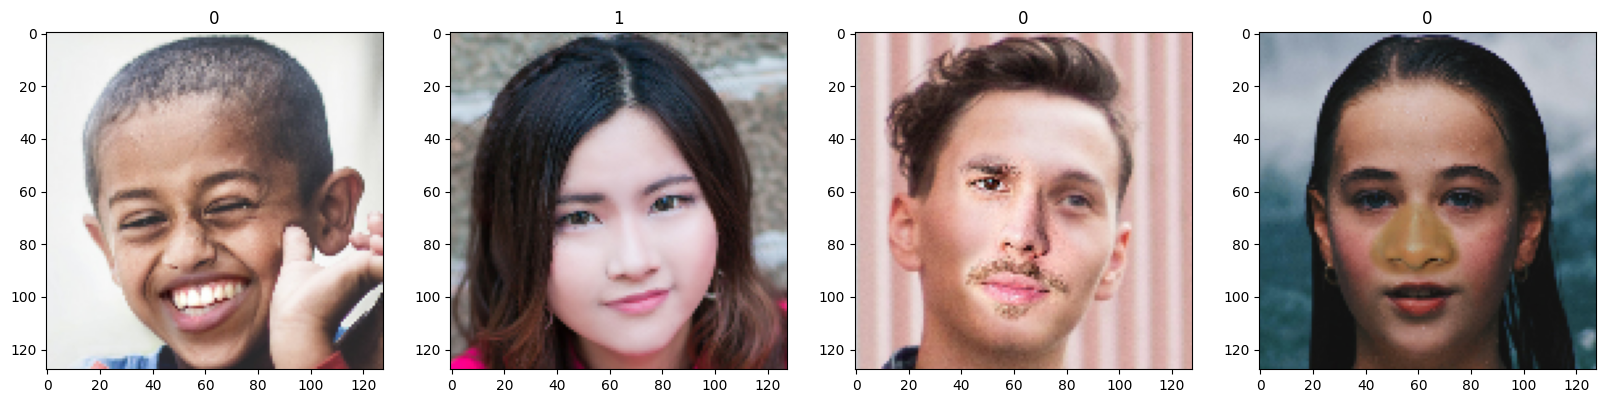

In [62]:
#--------PREPROCESSING DATA----------#
data=data.map(lambda x,y:(x/255,y))    
scaled=data.as_numpy_iterator()
batch=scaled.next()


fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for i,j in enumerate(batch[0][:4]):
    ax[i].imshow(j)    
    ax[i].title.set_text(batch[1][i])

In [63]:
#splitting the dataSet
print(len(data))
train=int(0.7*len(data)) #train--->70%
val=int(0.2*len(data))  #test---->20%
test=int(0.1*len(data))   #validation----->10%
print(train,test,val)

#shuffle dataset
data=data.shuffle(10000,seed=12)

#taking data
train_ds=data.take(train)
val_ds=data.skip(train).take(val)
test_ds=data.skip(test+val).take(test)

106
74 10 21


In [64]:
#MODEL BULIDING
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout

In [65]:
model=Sequential()

In [66]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [67]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [68]:
history=model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
74/74 [==============================] - 8s 82ms/step - loss: 0.6957 - accuracy: 0.5282 - val_loss: 0.7105 - val_accuracy: 0.4762
Epoch 2/10
74/74 [==============================] - 8s 82ms/step - loss: 0.6955 - accuracy: 0.5060 - val_loss: 0.6900 - val_accuracy: 0.5179
Epoch 3/10
74/74 [==============================] - 8s 82ms/step - loss: 0.6930 - accuracy: 0.5389 - val_loss: 0.6758 - val_accuracy: 0.5963
Epoch 4/10
74/74 [==============================] - 8s 82ms/step - loss: 0.6851 - accuracy: 0.5863 - val_loss: 0.6743 - val_accuracy: 0.5901
Epoch 5/10
74/74 [==============================] - 7s 81ms/step - loss: 0.6768 - accuracy: 0.5863 - val_loss: 0.6338 - val_accuracy: 0.7453
Epoch 6/10
74/74 [==============================] - 8s 82ms/step - loss: 0.6454 - accuracy: 0.6351 - val_loss: 0.6435 - val_accuracy: 0.6429
Epoch 7/10
74/74 [==============================] - 8s 82ms/step - loss: 0.6141 - accuracy: 0.6803 - val_loss: 0.6097 - val_accuracy: 0.6548
Epoch 8/10
74

In [55]:
for batch in test_ds.as_numpy_iterator(): 
    X, y = batch     
    res = model.predict(X)
    

1/1 [==============================] - 0s 84ms/step


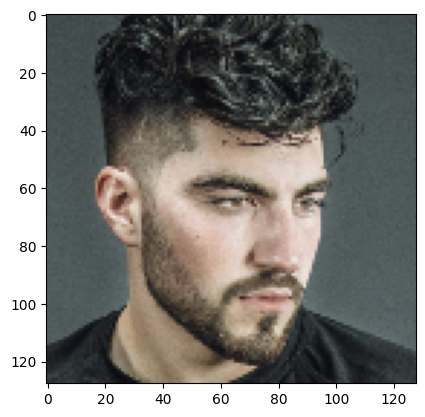

In [56]:
#unseen prediction
img=plt.imread('Real.jpg')
plt.imshow(img)

#resize according to layers
resize=tf.image.resize(img,(128,128))
plt.imshow(resize.numpy().astype(int)) 
plt.show()

#optimize the new image
resize=resize/255
#expand your image array
img=expand_dims(resize,0)

In [57]:
#prediction
pred=model.predict(img)
print(pred)

1/1 [==============================] - 0s 62ms/step
[[0.5664305]]


In [58]:
#since it is a binary classification

if pred[0]>0.5:
    print("real")
else:
    print("fake")

real
